<h1>521H0287 - Văn Công Nguyên Phong</h1>
<h1>521H0285 - Phạm Trần Tiến Phát</h1>
<h1>521H0302 - Trương Công Thành</h1>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
current_directory = os.getcwd()
csv_filename = 'data.csv'
csv_path = os.path.join(current_directory, "data" ,csv_filename)
billionaires = pd.read_csv(csv_path)

In [3]:
data = billionaires
# Basic exploration of the dataset
data.info()
data.describe()

# Handling missing values
data.isnull().sum()

# Dropping unnecessary columns
data = data.drop(columns=['organization', 'title', 'state', 'residenceStateRegion'])

# Further handling missing values after dropping columns
data.isnull().sum()

# Dropping additional columns
data = data.drop(columns=['cpi_country', 'cpi_change_country', 'life_expectancy_country', 'tax_revenue_country_country',
                          'latitude_country', 'longitude_country', 'city', 'date', 'birthDate', 'birthYear', 'birthMonth', 'birthDay'])

# Handling missing values in the 'country' column
data['country'].fillna('Unknown', inplace=True)
data.isnull().sum()

# Checking data types and fixing 'gdp_country' data type
data.dtypes
data['gdp_country'] = data['gdp_country'].str.replace('$', '')
data['gdp_country'] = data['gdp_country'].str.replace(',', '')
data['gdp_country'] = pd.to_numeric(data['gdp_country'])

# Checking skewness of specific columns
print(data['gross_primary_education_enrollment_country'].skew(), data['population_country'].skew(), sep='\n')

# Handling missing values using SimpleImputer
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='mean')
data[['age', 'gdp_country', 'gross_tertiary_education_enrollment', 'total_tax_rate_country']] = mean_imputer.fit_transform(data[['age', 'gdp_country', 'gross_tertiary_education_enrollment', 'total_tax_rate_country']])
median_imputer = SimpleImputer(strategy='median')
data[['gross_primary_education_enrollment_country', 'population_country']] = median_imputer.fit_transform(data[['gross_primary_education_enrollment_country', 'population_country']])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

C:\Users\phong\AppData\Local\Temp\ipykernel_23580\2442509744.py:25: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['gdp_country'] = data['gdp_country'].str.replace('$', '')


In [4]:
# Checking for remaining missing values
data.isnull().sum()

rank                                          0
finalWorth                                    0
category                                      0
personName                                    0
age                                           0
country                                       0
source                                        0
industries                                    0
countryOfCitizenship                          0
selfMade                                      0
status                                        0
gender                                        0
lastName                                      0
firstName                                     3
gdp_country                                   0
gross_tertiary_education_enrollment           0
gross_primary_education_enrollment_country    0
total_tax_rate_country                        0
population_country                            0
dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

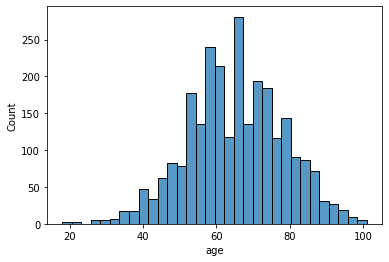

In [5]:
import seaborn as sns
import plotly.express as px

# Visualizing age distribution
sns.histplot(data, x='age')

# Age Insights
# 1. Most number of billionaires belong to the age group 64-65.9 (count=189).
# 2. The youngest billionaire is 18 years old and the oldest is 101 years old.
# 3. 89% of billionaires are at least 50 years old

Country Insights
1. The United States has the most number of billionaires followed by China and then India.
2. 48.37% of billionaires reside in the US or China.
3. Out of the billionaires who migrated from their country of citizenship, 53.48% moved to either the UK, Switzerland, US, or China (out of total 36 countries)

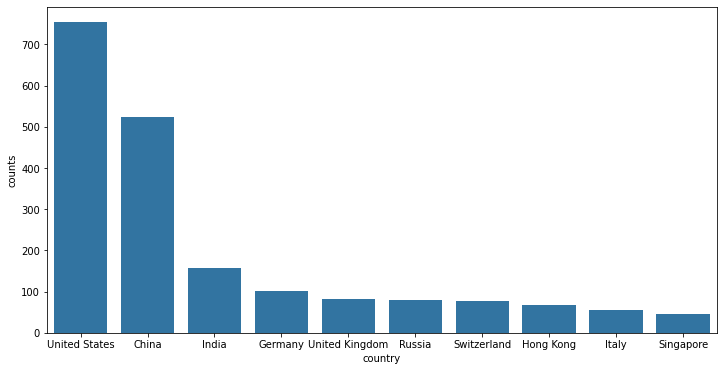

In [6]:
# Bar chart of top 10 countries with the most billionaires
country_data = data.groupby('country').size().reset_index(name='counts').sort_values('counts', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(country_data, x='country', y='counts')
plt.show()

<AxesSubplot:xlabel='countryOfCitizenship', ylabel='counts'>

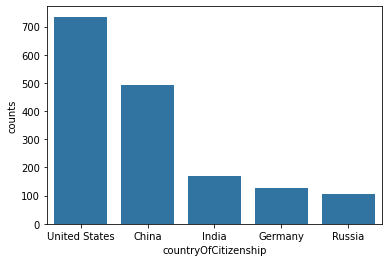

In [7]:
# Bar chart of top 5 countries with the most billionaires by citizenship
country_data = data.groupby('countryOfCitizenship').size().reset_index(name='counts').sort_values('counts', ascending=False).head(5)
sns.barplot(country_data, x='countryOfCitizenship', y='counts')

In [8]:
# Industry Insights
# 1. The Finance & Investment Industry has the most number of billionaires.
# 2. The fewest billionaires work in gambling and casinos.
# 3. On average, a billionaire working in the automotive industry has the highest net worth (7195.89) compared to the construction & engineering industry (2633.33).

# Grouping and visualizing industry data
bills_industry = data.groupby('industries', as_index=False).size().sort_values(by='size', ascending=False)

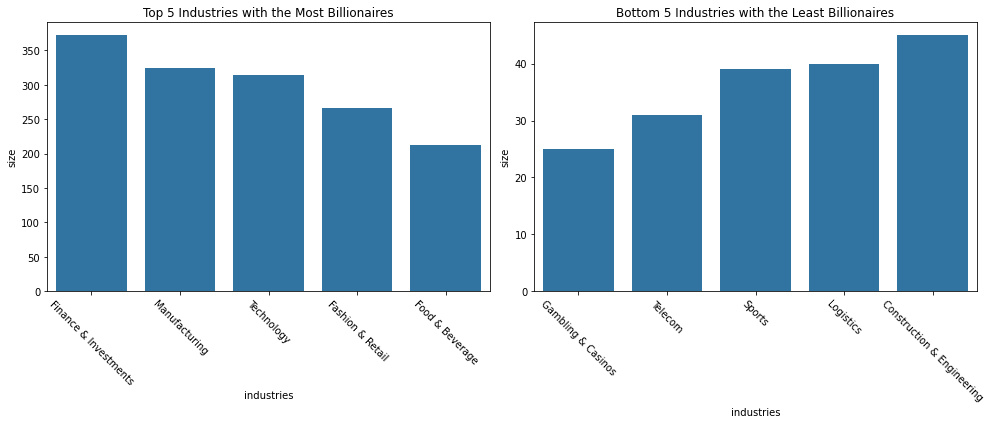

In [9]:
# Bar chart of top 5 industries with the most billionaires
top5_bills = data.groupby('industries', as_index=False).size().sort_values(by='size', ascending=False).head(5)
bottom5_bills = data.groupby('industries', as_index=False).size().sort_values(by='size', ascending=True).head(5)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Bar chart for top 5 industries
sns.barplot(ax=axes[0], data=top5_bills, x='industries', y='size')
axes[0].set_title('Top 5 Industries with the Most Billionaires')
axes[0].tick_params(axis='x', rotation=-45)

# Bar chart for bottom 5 industries
sns.barplot(ax=axes[1], data=bottom5_bills, x='industries', y='size')
axes[1].set_title('Bottom 5 Industries with the Least Billionaires')
axes[1].tick_params(axis='x', rotation=-45)

plt.tight_layout()
plt.show()

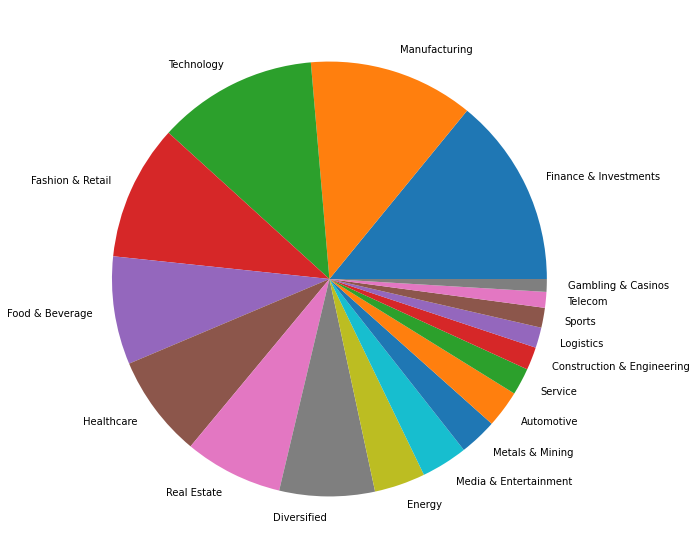

In [10]:
# Pie chart of industry distribution
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10), facecolor='white')
plt.pie(bills_industry["size"], labels=bills_industry['industries'])
plt.show()

In [11]:
# Mean net worth by industry
data[['industries', 'finalWorth']].groupby('industries', as_index=False).mean().sort_values('finalWorth', ascending=False)

,industries,finalWorth
0,Automotive,7195.890411
17,Telecom,6564.516129
4,Fashion & Retail,6386.466165
12,Metals & Mining,6037.837838
9,Logistics,5987.500000
16,Technology,5980.573248
2,Diversified,4840.641711
7,Gambling & Casinos,4820.000000
11,Media & Entertainment,4697.802198
3,Energy,4535.000000


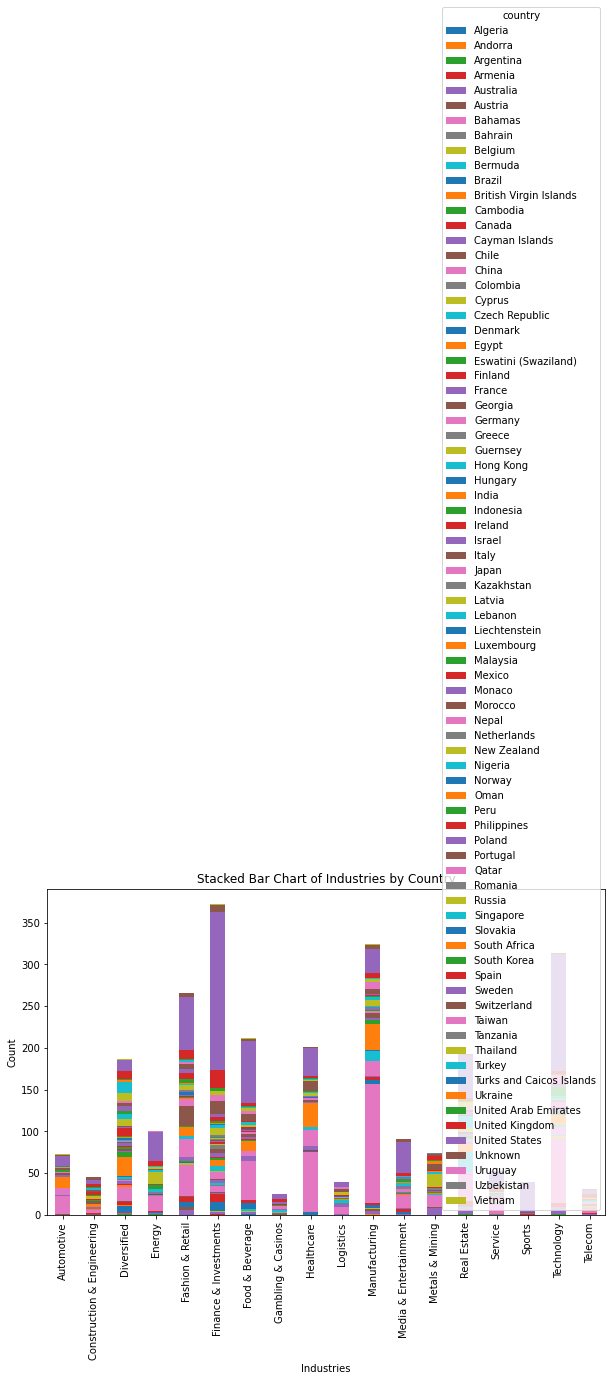

In [12]:
# Stacked bar chart of industries by country
grouped = data[['industries', 'country']].groupby(['industries', 'country']).size().unstack(fill_value=0)
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel("Industries")
plt.ylabel("Count")
plt.title("Stacked Bar Chart of Industries by Country")
plt.show()

# Self Made Insights
# 1. 68.6% of billionaires are self-made.
# 2. 100% of billionaires from Russia and 96.74% from China are self-made, compared to 71.6% from the United States.

In [13]:
# Grouping and visualizing self-made data
self_made = data.groupby('selfMade', as_index=False).size()
self_made['selfMade'].replace(False, 'Not Self Made', inplace=True)
self_made['selfMade'].replace(True, 'Self Made', inplace=True)

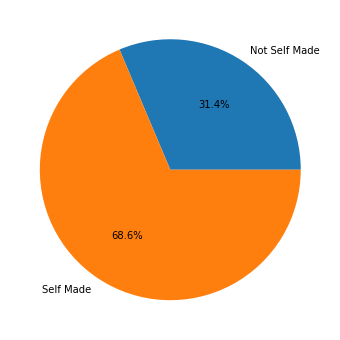

In [14]:
# Pie chart of self-made distribution
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 6), facecolor='white')
plt.pie(self_made["size"], labels=self_made['selfMade'], autopct='%1.1f%%')
plt.show()

In [15]:
# Self-made vs. Inherited net worth comparison
data[['selfMade', 'finalWorth']].groupby('selfMade').mean()

,finalWorth
selfMade,
False,4970.410628
True,4465.397351


selfMade,False,True
country,,
China,17,506
Russia,0,79
United States,214,540


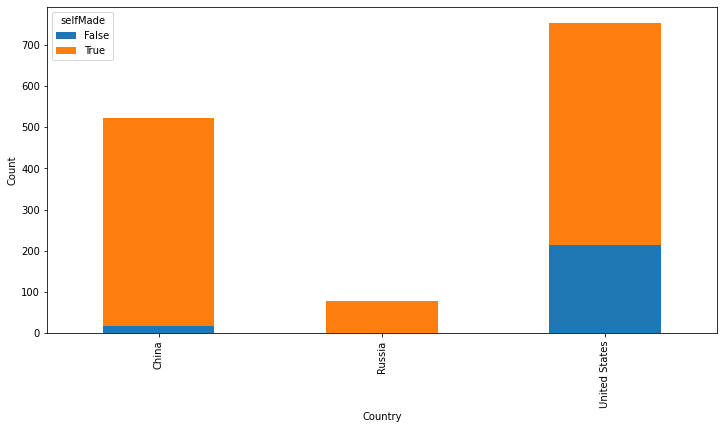

In [16]:
# Self-made distribution by country
country_self_made = data[(data['country'] == 'China') | (data['country'] == 'Russia') | (data['country'] == 'United States')][['selfMade', 'country']].groupby(['country', 'selfMade']).size().unstack(fill_value=0)
plot = country_self_made.plot(kind='bar', stacked='True', figsize=(12, 6))
plt.xlabel("Country")
plt.ylabel("Count")
country_self_made

Gender Insights
1. 87.2% of billionaires are men.
2. The mean net worth of women is lower than that of men, but there is no statistically significant difference.
3. The most popular industry among women billionaires is Food & Beverage, whereas for men billionaires, it is Finance & Investments.
4. Self-made percentage for women is 28.48%, and for men, it is 74.51%.

<AxesSubplot:ylabel='gender'>

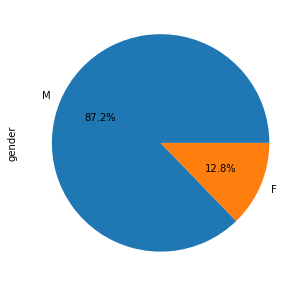

In [17]:
# Visualizing gender distribution
fig = plt.figure(figsize=(5, 5), facecolor='white')
data['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [18]:
# Mean net worth by gender
data.groupby('gender', as_index=False)['finalWorth'].mean()

,gender,finalWorth
0,F,4570.326409
1,M,4631.610942


In [19]:
# Hypothesis Testing
# Is there a significant difference between the net worth of male and female billionaires?
# Ho = No difference in net worth
# H1 = Difference in net worth

female_fw = data[data['gender'] == 'F']['finalWorth']
male_fw = data[data['gender'] == 'M']['finalWorth']
import scipy.stats as stats
t_statistic, p_value = stats.ttest_ind(male_fw, female_fw)

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# As the T value is small and the P value is far greater than 0.05, the conclusion is that there is no statistically significant difference in the final worth of men and women.

T-statistic: 0.10682886908089109
P-value: 0.9149328674378735


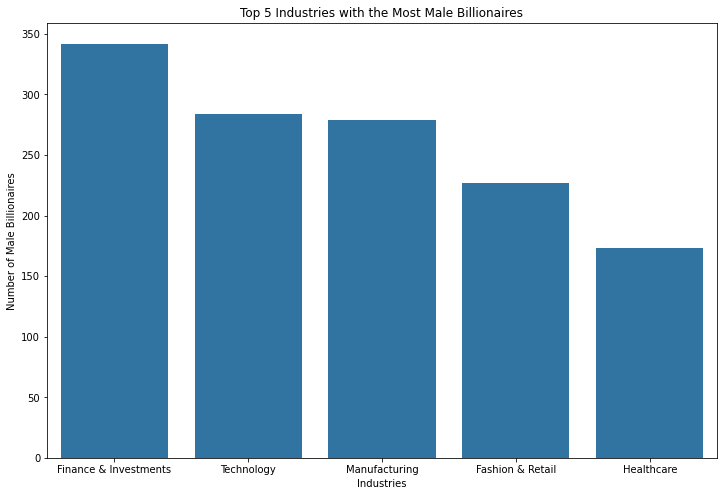

In [20]:
# Top 5 industries with the most male billionaires
plt.figure(figsize=(12, 8))


ind_m=data[data.gender=='M'].groupby('industries',as_index=False).size().sort_values('size',ascending=False)
ind_m['pct']=(ind_m['size']/ind_m['size'].sum())*100
sns.barplot(ind_m.head(5),x='industries',y='size')

plt.xlabel('Industries')
plt.ylabel('Number of Male Billionaires')
plt.title('Top 5 Industries with the Most Male Billionaires')

# Show the plot
plt.show()

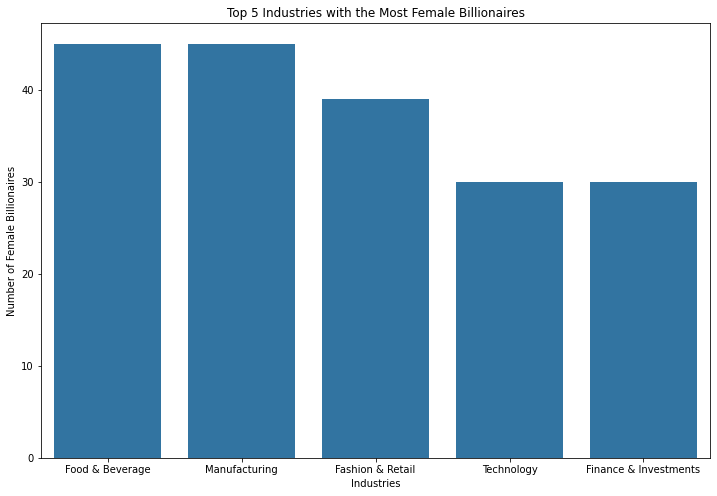

In [21]:
ind_f=data[data.gender=='F'].groupby('industries',as_index=False).size().sort_values('size',ascending=False)
ind_f['pct']=(ind_f['size']/ind_f['size'].sum())*100

plt.figure(figsize=(12, 8))
sns.barplot(ind_f.head(5),x='industries',y='size')

plt.xlabel('Industries')
plt.ylabel('Number of Female Billionaires')
plt.title('Top 5 Industries with the Most Female Billionaires')

# Show the plot
plt.show()

In [22]:
# Grouping the dataset by gender and self-made status and calculating the count of billionaires in each category
df_g_sf=data.groupby(['gender','selfMade'],as_index=False).size()

<AxesSubplot:xlabel='gender', ylabel='size'>

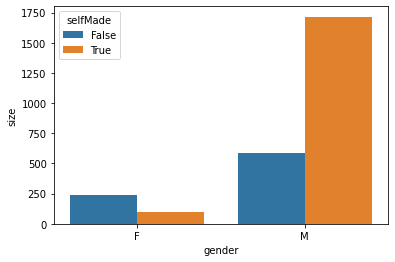

In [23]:
sns.barplot(df_g_sf,x='gender',y='size',hue='selfMade')